### Auctions data

The auction dataset has been taken from this <a href="https://github.com/jasonshi10/art_auction_valuation">repository</a> which has taken data webscraping the old website of Blouin Art Sales index. During 2014 that website made available a lot of auction data for free <a href="https://web.archive.org/web/20141018210450/http://artsalesindex.artinfo.com/asi/search/artistLanding.ai">(see here)</a>, now data is available only under subscription as other websites like Artsy. 


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
getty2 = pd.read_csv("../deKooning/auctions.csv", sep=";", encoding="iso-8859-1")

getty2

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


In [4]:
from collections import Counter
liss = {}
for column_name in getty2.columns:
    if column_name == "artist":
        for value in getty2[column_name]:
            if value not in liss:
                liss[value] = 1
            else:
                liss[value] += 1
k = Counter(liss)

# sobstitute nan with "nan"
x = list(liss.keys())

for i in x:
    if type(i) != str:
      liss['nan'] = liss[i]  
      liss.pop(i)

 
# Finding 3 highest values
high = k.most_common(4) 
 
print("Initial Dictionary:")
print(liss, "\n")
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'After  Hans von Aachen': 1, 'Hans von Aachen': 1, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen Aas': 1, '

In [5]:
# Finding 10 highest values
high = k.most_common(10) 
 
print("Initial Dictionary:")
print(liss, "\n")
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'After  Hans von Aachen': 1, 'Hans von Aachen': 1, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen Aas': 1, '

In [6]:
# Finding 20 highest values
high = k.most_common(20) 
 
print("Initial Dictionary:")
print(liss, "\n")
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'After  Hans von Aachen': 1, 'Hans von Aachen': 1, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen Aas': 1, '

In [7]:
# count the total number of artists in the dataset
total_artists = len(x)

print("total number of artists",total_artists)

# Extract keys with value 1
keys_with_value_1 = [key for key, value in k.items() if value == 1]

# Count of keys with value 1
count_keys_with_value_1 = len(keys_with_value_1)

print("Keys with value 1:", keys_with_value_1)
print("Number of keys with value 1:", count_keys_with_value_1)


# Extract keys with value between 1 and 5
keys_with_value_minor_5 = [key for key, value in k.items() if 1 < value <= 5]


# Count of keys with value 5
count_keys_with_value_minor_5 = len(keys_with_value_minor_5)

print("Keys with value minor than 5:", keys_with_value_minor_5)
print("Number of keys with value minor than 5 :", count_keys_with_value_minor_5)


# extract keys with value between 5 and 10
keys_with_value_minor_10= [key for key, value in k.items() if 5 < value <= 10]


# Count of keys with value minor than 10
count_keys_with_value_minor_10 = len(keys_with_value_minor_10)

print("Keys with value minor than 10:", keys_with_value_minor_10)
print("Number of keys with value minor than 10:", count_keys_with_value_minor_10)


# extract keys with value greater than 10
keys_with_value_minor_10= [key for key, value in k.items() if value > 10]


# Count of keys with value greater than 10
count_keys_with_value_minor_10 = len(keys_with_value_minor_10)

print("Keys with value greater than 10:", keys_with_value_minor_10)
print("Number of keys with value greater than 10:", count_keys_with_value_minor_10)




total number of artists 8619
Keys with value 1: ['A E Cremer', 'A H', 'A H G', 'A K', 'A Kassen', 'A M', "A'erbai", 'A.CE', 'Christian Aabye-Talge', 'Studio of  Hans von Aachen', 'After  Hans von Aachen', 'Hans von Aachen', 'Peder Pedersen Aadnes', 'H P Aaland', 'Susanne Aamund', 'Leny Aardse', 'John Aaron', 'Michel Aaron', 'Hans Aarsman', 'Pieter Jan Aarts', 'Alf Jorgen Aas', 'Astri Aasen', 'T Abacchi', 'Francisco Abad Doblas', 'Jorge Abade', 'Stanko Abadzic', 'Tomas Abal', 'Fernando Abalo', 'Felipe Abarzuza y Rodriguez Arias', 'Felipe Barantes Abascal', 'Chingiz Abassov', 'Claudio Abate', 'Serge Abate', 'Nadim Abbas', 'Norma Abbas', "Sa'adi Abbas", 'Salman Abbas', 'After  Riza-i Abbasi', 'School of  Riza-i Abbasi', 'Follower of  Riza-i Abbasi', 'Style of  Riza-i Abbasi', 'School of  Shaykh Abbasi', 'Attributed to  Shaykh Abbasi', 'Samira Abbassy', 'Adalberto Abbate', 'Attributed to  Giuseppe Abbati', 'Attributed to  Vincenzo Abbati', 'Vincenzo Abbati', 'Agnes Dean Abbatt', 'Dennis Ab

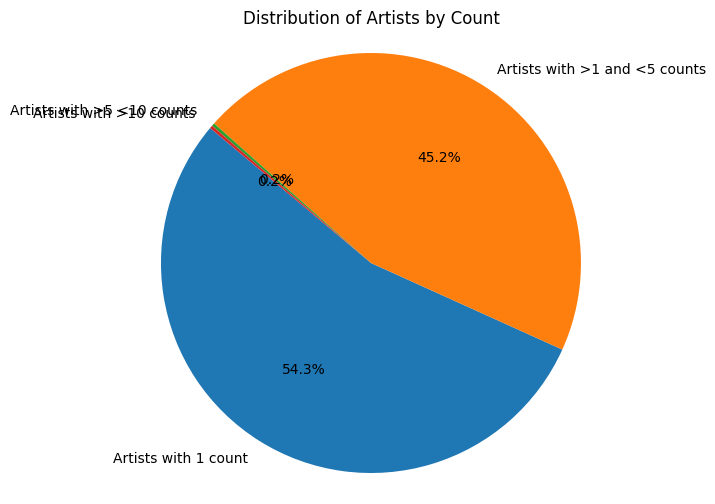

In [8]:
import matplotlib.pyplot as plt
from collections import Counter


# Create labels for the slices
labels = ['Artists with 1 count', 'Artists with >1 and <5 counts', 'Artists with >5 <10 counts', 'Artists with >10 counts']

# Count for each group
sizes = [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_minor_10]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Artists by Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


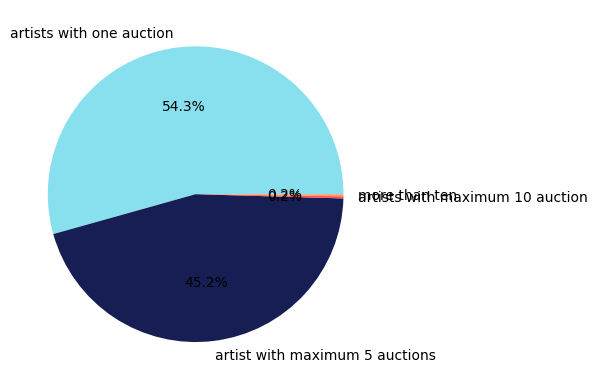

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_minor_10,]
labels = ['artists with one auction', 'artist with maximum 5 auctions', 'artists with maximum 10 auction', 'more than ten' ]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = ['#88E0EF','#161E54', '#FF5151', '#FF9B6A'], autopct='%.1f%%')
plt.show()



In [10]:
import matplotlib.pyplot as plt

# Sort keys and values together in descending order based on values
sorted_items = sorted(more_than_10_dict.items(), key=lambda item: item[1], reverse=True)
sorted_keys = [key for key, value in sorted_items]
sorted_values = [value for key, value in sorted_items]

# Creating the bar chart
plt.figure(figsize=(7, 4))
plt.bar(sorted_keys, sorted_values, color='skyblue')
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Chart of Values (Sorted)')
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


NameError: name 'more_than_10_dict' is not defined

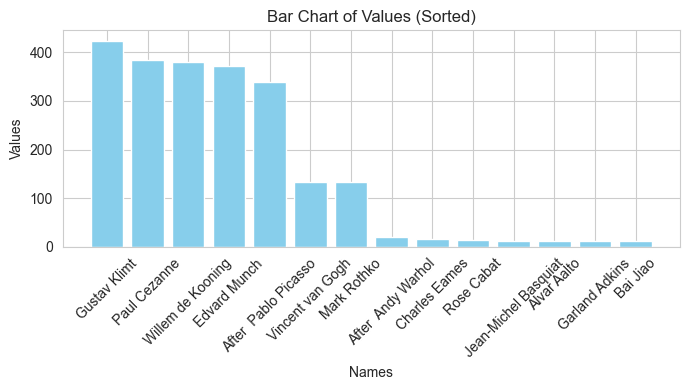

In [ ]:
import matplotlib.pyplot as plt

# Sort keys and values together in descending order based on values
sorted_items = sorted(more_than_10_dict.items(), key=lambda item: item[1], reverse=True)
sorted_keys = [key for key, value in sorted_items][2:]
sorted_values = [value for key, value in sorted_items][2:]

# Creating the bar chart
plt.figure(figsize=(7, 4))
plt.bar(sorted_keys, sorted_values, color='skyblue')
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Chart of Values (Sorted)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# De Kooning
correggere dataset per ridurre di uno zero

In [ ]:
liss = []
for column_name in getty2.columns:
    if column_name == "artist":
        for value in getty2[column_name]:
            if value == "Willem de Kooning":
                liss.append(value)
print(len(liss))

381


Get only results related to sales on De Kooning works. Artworks that do not possess data about price or soldtime have been deleted from the dataset.
The dataset does not possess any data related to sellers and buyers. 
In this example we notice that 307 works over a total of 381 possess data about price and time of the transaction. 

In [ ]:
import pandas as pd

new_dataframe = getty2[["artist", "name", "price", "soldtime"]].copy()
new_dataframe = new_dataframe[new_dataframe["artist"] == "Willem de Kooning"].copy()

new_dataframe.reset_index(drop=True, inplace=True)

for idx, row in new_dataframe.iterrows():
    if pd.isna(row["price"]) and pd.isna(row["soldtime"]):
        new_dataframe.drop(idx, inplace=True)
        
dayy = []
for i in new_dataframe['soldtime']:
    string_representation = str(i)
    split_parts = string_representation.split('-')
    day = split_parts[0]
    dayy.append(day)
new_dataframe['soldtime'] = dayy
        

new_dataframe.reset_index(drop=True, inplace=True)
new_dataframe.to_csv('auctions_data_DK.csv', index=False)
new_dataframe

,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.00,2014
1,Willem de Kooning,Untitled,20450000.00,2014
2,Willem de Kooning,Untitled,1125000.00,2014
3,Willem de Kooning,Untitled XVIII,48690000.00,2014
4,Willem de Kooning,Untitled XXIV,175250000.00,2014
...,...,...,...,...
302,Willem de Kooning,Woman V,3130000.00,2008
303,Willem de Kooning,Untitled IV,120810000.00,2008
304,Willem de Kooning,With love,44000.00,2008
305,Willem de Kooning,Untitled (Spoleto),1210000.00,2008


In [ ]:
#find out if there are duplicates. This table is with unique values.
# Assuming df is your DataFrame and 'column_name' is the name of the column you want to get distinct values from
filtered_df = new_dataframe.drop_duplicates(subset=['name'])

# This will give you an array of unique values from the specified column
filtered_df


,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.00,2014
3,Willem de Kooning,Untitled XVIII,48690000.00,2014
4,Willem de Kooning,Untitled XXIV,175250000.00,2014
5,Willem de Kooning,Untitled III,147250000.00,2014
6,Willem de Kooning,Two Figures I,8150000.00,2014
...,...,...,...,...
293,Willem de Kooning,Untitled (Figures),237500.00,2008
302,Willem de Kooning,Woman V,3130000.00,2008
303,Willem de Kooning,Untitled IV,120810000.00,2008
304,Willem de Kooning,With love,44000.00,2008


# daniele


In [ ]:
#move from date to integer
new_dataframe['soldtime'] = new_dataframe['soldtime'].astype(int)

# Divide all values in the 'price' column by 10
new_dataframe['price'] = new_dataframe['price'] / 10


In [ ]:
values_counts = new_dataframe['name'].value_counts()
values_counts

Untitled                                                       90
Woman                                                           6
Love to Wakako                                                  6
High School Desk                                                6
Untitled (Woman)                                                5
                                                               ..
Torso Of a Man                                                  1
Figures In Landscape VI                                         1
Clam Digger (G. 10)                                             1
Revenge (Graham 1); And Washington Monument (Not In Graham)     1
Untitled (Spoleto)                                              1
Name: name, Length: 150, dtype: int64

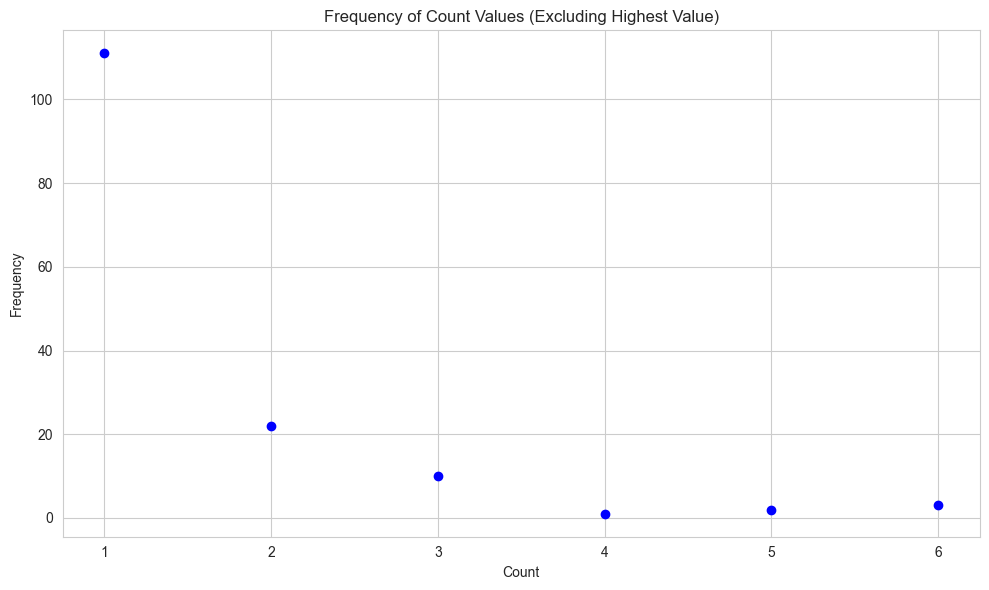

In [ ]:
import matplotlib.pyplot as plt

# Assuming values_counts is your Series with the value counts

# Exclude the highest count value
values_counts_excluded = values_counts[values_counts != values_counts.max()]

# Calculate the frequency of each count value
count_frequency = values_counts_excluded.value_counts()

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(count_frequency.index, count_frequency.values, color='blue')
plt.title('Frequency of Count Values (Excluding Highest Value)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


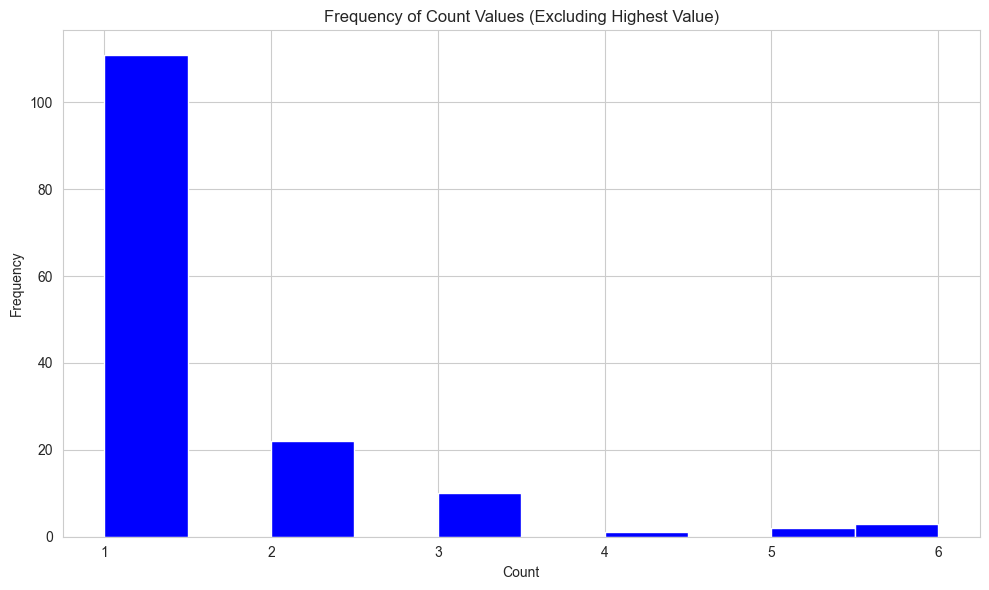

In [ ]:
#alternativa a quello di sopra

# Assuming values_counts is your Series with the value counts

# Exclude the highest count value
values_counts_excluded = values_counts[values_counts != values_counts.max()]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(values_counts_excluded, bins=10, color='blue')  # Adjust the number of bins as needed
plt.title('Frequency of Count Values (Excluding Highest Value)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


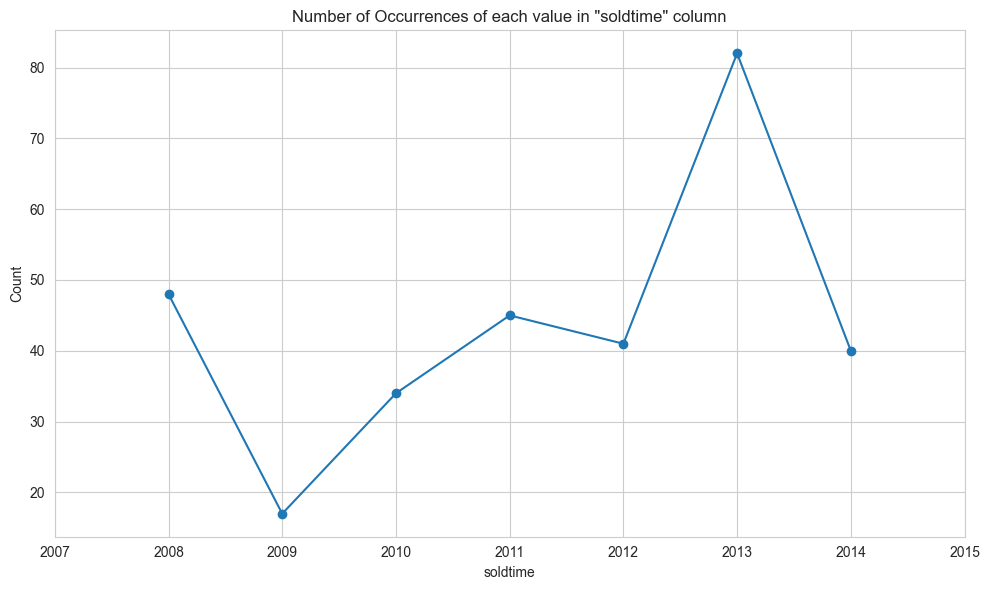

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'soldtime' column

# First, let's count the occurrences of each value in the 'soldtime' column
soldtime_counts = new_dataframe['soldtime'].value_counts().sort_index()

# Now, let's plot the counts as a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
soldtime_counts.plot(kind='line', marker='o')  # Use marker 'o' for better visibility of data points
plt.title('Number of Occurrences of each value in "soldtime" column')
plt.xlabel('soldtime')
plt.ylabel('Count')
plt.grid(True)  # Add gridlines for better visualization

# Add some space between the edges of the graph and the line
plt.xlim(soldtime_counts.index.min() - 1, soldtime_counts.index.max() + 1)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
#media totale, media per anno 

pd.options.display.float_format = '{:.2f}'.format


mean_price = new_dataframe['price'].mean()

print('overall mean:', mean_price)


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year = new_dataframe.groupby('soldtime')['price'].mean()


# Print the mean price for each year
print(mean_price_per_year)




overall mean: 1200612.38762215
soldtime
2008    779880.60
2009    760305.76
2010    978857.88
2011    712840.71
2012   1084915.24
2013   1507841.98
2014   2118624.23
Name: price, dtype: float64


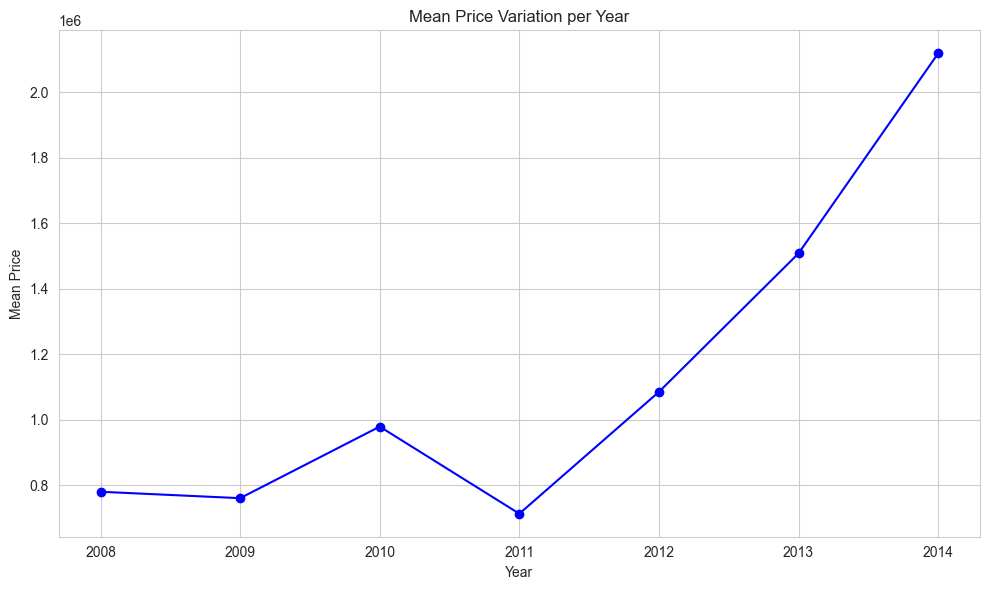

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Plot the variation of mean price per year
plt.figure(figsize=(10, 6))
mean_price_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Mean Price Variation per Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.tight_layout()
plt.show()


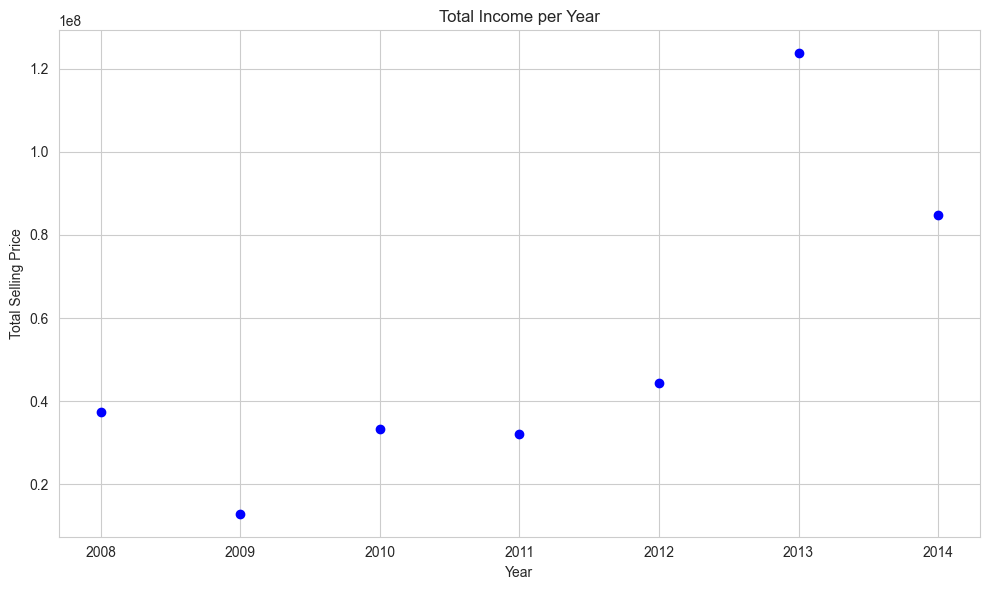

In [ ]:
# Total income

# Aggregate the data to get the total selling price for each year
total_selling_per_year = new_dataframe.groupby('soldtime')['price'].sum()

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(total_selling_per_year.index, total_selling_per_year.values, color='blue')
plt.title('Total Income per Year')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()


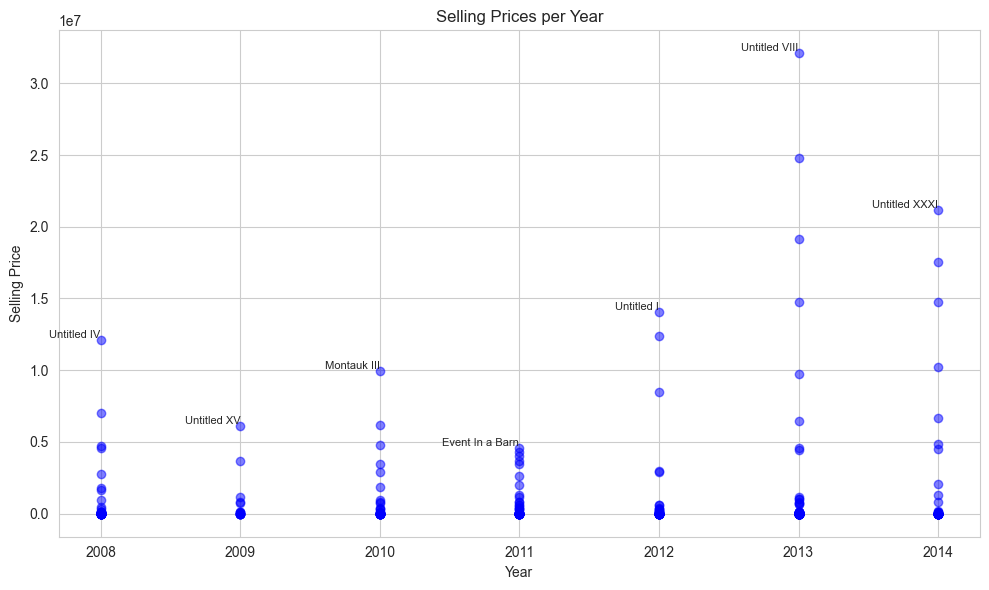

In [ ]:
# sold and best sellings

import matplotlib.pyplot as plt

# Find the maximum selling price for each year
max_price_per_year = new_dataframe.groupby('soldtime').apply(lambda x: x.loc[x['price'].idxmax()])

# Plot the scatterplot
plt.figure(figsize=(10, 6))
for year, price in new_dataframe.groupby('soldtime')['price']:
    plt.scatter([year] * len(price), price, color='blue', alpha=0.5)

# Add labels for maximum selling price for each year
for year, max_data in max_price_per_year.iterrows():
    plt.text(year, max_data['price'], max_data['name'], fontsize=8, ha='right', va='bottom')

plt.title('Selling Prices per Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()
